# FX Barrier Option Pricing

## **📌 Why Black-Scholes is Incorrect for Barrier Options**
The standard **Black-Scholes model** is **not directly applicable** to **barrier options** because it does not consider the probability of hitting the barrier. Instead, we will utilize a proper analytical solution for pricing **FX barrier options**  that comes from:
1. **Reiner and Rubinstein (1991)** for single-barrier options.

## **📌 Pricing Approach for FX Barrier Options**
### **🔹 Steps for Pricing**
1. Use the **closed-form solutions** for FX barrier options.
2. Compute the **adjusted Black-Scholes price**, considering the probability of hitting the barrier.
3. Implement the **reflection principle** for up-and-out/down-and-out options.

## **📌 Correct Pricing Formulas (Reiner & Rubinstein)**
The closed-form formulas correctly adjust option prices for **knock-in** and **knock-out barriers**.


### **🔹 Closed-Form Pricing Equations**
#### **1️⃣ Down-and-Out Call**
$C_{DO} = C_{BS} - C_{REFL}$

Where:
-  $C_{BS}$  = Vanilla call option price (**Black-Scholes**)
- $C_{REFL}$ = Reflective option price considering the barrier.

#### **2️⃣ Down-and-In Call**
$
C_{DI} = C_{BS} - C_{DO}
$

#### **3️⃣ Up-and-Out Call**
$
C_{UO} = C_{BS} - C_{REFL}
$

#### **4️⃣ Up-and-In Call**
$
C_{UI} = C_{BS} - C_{UO}
$

The **reflective term** accounts for the probability of hitting the barrier using the **mirrored asset price method**.

### **📌 Python Implementation**
We implement the **Reiner-Rubinstein** model inside a new class `FXBarrierOption`, which extends `BlackScholes`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../src"))  # Dynamically add src folder
import numpy as np
import matplotlib.pyplot as plt
from src.barrier_options import FXBarrierOption

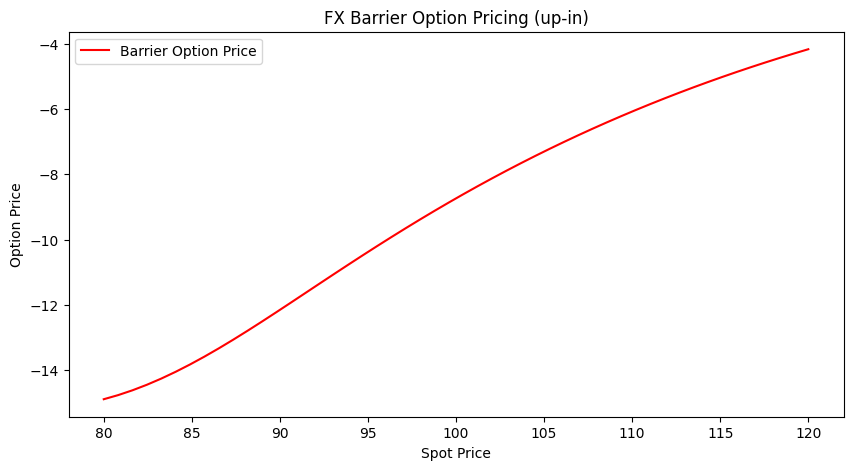

In [8]:
# Define parameters
spot_prices = np.linspace(80, 120, 50)
strike_price = 100
time_to_maturity = 3
volatility = 0.2
domestic_rate = 0.05
foreign_rate = 0.02
barrier_level = 110
barrier_type = "up-in"

barrier_prices = []

# Compute prices for different spot prices
for S in spot_prices:
    barrier_option = FXBarrierOption(S, strike_price, time_to_maturity, volatility, domestic_rate, foreign_rate, barrier_level, barrier_type)
    barrier_prices.append(barrier_option.calculate_barrier_price())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(spot_prices, barrier_prices, label="Barrier Option Price", color="red")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.title(f"FX Barrier Option Pricing ({barrier_type})")
plt.legend()
plt.show()

